Data Loading

Loading the libraries

Airbnb hosts in Boston struggle to attract guests due to poor pricing, limited visibility, and listings that don't highlight local attractions or unique features. Without proper data analytics, many set prices that are either too high, driving away bookings, or too low, hurting profitability. This limits Airbnb’s growth and undermines local economic benefits while missing opportunities to promote Boston cultural heritage. Unlike hotels that rely on brand recognition, Airbnb guests depend on user reviews and listing details to gauge value, often willing to pay more for well-rated properties. However, hosts don’t have clear guidance on which features, like location, amenities, or host responsiveness, affect guest satisfaction and pricing.
Boston. By analyzing reviews, proximity to attractions, seasonal demand, and host service quality, we will extract key insights. Natural language processing (NLP) will help identify what guests value, their expectations, and improvement areas. This will enable hosts to set competitive prices that balance occupancy and profitability. - Improve listing quality based on guest preferences. Increase visibility by showcasing unique features and local attractions.

In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Read the Data

In [171]:
listing = pd.read_csv('/content/boston_airbnb_listing.csv')
reviews = pd.read_csv('/content/boston_airbnb_customer_reviews.csv')

In [49]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,2.016090e+13,07/09/2016,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,2.016090e+13,07/09/2016,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,2.016090e+13,07/09/2016,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,2.016090e+13,07/09/2016,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,2.016090e+13,07/09/2016,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [172]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,15846810,16/07/2014,17826223,Raija,OK stay. Perhaps best for those on the young/...
1,1178162,15895093,17/07/2014,18020631,Lucas,Izzy was very helpful with directions and he w...
2,1178162,15982012,19/07/2014,7543714,Anne-Marie,This was ok it was easy with clear information...
3,1178162,16035159,20/07/2014,17287987,Shu-Ping,Izzy was out of the town when I stayed there. ...
4,1178162,16221436,23/07/2014,2420725,Jessica,"Unfortunately, we can't agree with the many po..."


Information About the dataset

In [173]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   float64
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [174]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63415 entries, 0 to 63414
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     63415 non-null  int64 
 1   id             63415 non-null  int64 
 2   date           63415 non-null  object
 3   reviewer_id    63415 non-null  int64 
 4   reviewer_name  63415 non-null  object
 5   comments       63366 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


In [175]:
listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016090e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016090e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016090e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016090e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016090e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016090e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [176]:
reviews.describe()

,listing_id,id,reviewer_id
count,6.341500e+04,6.341500e+04,6.341500e+04
mean,4.754891e+06,5.238851e+07,2.791957e+07
std,3.810116e+06,2.802650e+07,2.235520e+07
min,5.506000e+03,1.021000e+03,1.430000e+02
25%,1.373520e+06,2.977688e+07,8.876600e+06
50%,4.054079e+06,5.213034e+07,2.286488e+07
75%,7.434871e+06,7.670071e+07,4.197486e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


In [177]:
listing['city'].value_counts()

,count
city,
Boston,3381
Roxbury Crossing,24
Somerville,19
Jamaica Plain,18
Brookline,18
Cambridge,16
Brighton,15
Dorchester,15
Charlestown,15


In [178]:
listing['cancellation_policy'].value_counts()

,count
cancellation_policy,
strict,1582
flexible,999
moderate,919
super_strict_30,85


In [180]:
listing['host_response_time'].value_counts()

,count
host_response_time,
within an hour,1384
within a few hours,1218
within a day,469
a few days or more,43


In [181]:
listing['street'].value_counts()

,count
street,
"Boylston Street, Boston, MA 02215, United States",64
"Beacon Street, Boston, MA 02116, United States",50
"Garrison Street, Boston, MA 02116, United States",44
"Brookline Avenue, Boston, MA 02215, United States",41
"Columbus Avenue, Boston, MA 02116, United States",31
...,...
"Metropolitan Ave, Boston, MA 02131, United States",1
"Chisholm Lane, Boston, MA 02131, United States",1
"Westbourne Terrace, Brookline, MA 02446, United States",1


In [182]:
listing['smart_location'].value_counts()

,count
smart_location,
"Boston, MA",3381
"Roxbury Crossing, MA",24
"Somerville, MA",19
"Brookline, MA",18
"Jamaica Plain, MA",18
"Cambridge, MA",16
"Charlestown, MA",15
"Brighton, MA",15
"Dorchester, MA",15


In [183]:
listing['is_location_exact'].value_counts()

,count
is_location_exact,
t,3080
f,505


In [184]:
listing.describe(include='object')

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,extra_people,calendar_updated,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3585,3585,3585,3442,2528,3585,3585,2170,1610,2295,...,3585,3585,3585,2829,2829,3585,3585,3585,3585,3585
unique,3585,1,3504,3113,2268,3423,1,1728,1266,1852,...,51,38,1,975,404,1,2,4,2,2
top,https://www.airbnb.com/rooms/14504422,07/09/2016,Lux 2BR by Fenway w/WiFi,"The unit is stylishly designed for comfort, va...",The studio's kitchenette comes equipped with a...,"The unit is stylishly designed for comfort, va...",none,Conveniently bordering the neighborhoods of th...,Although we do not allow pets in our apartment...,"These newly constructed, luxury apartments epi...",...,$0.00,today,06/09/2016,05/04/2016,05/09/2016,f,f,strict,f,f
freq,1,3585,8,21,17,7,3585,21,44,26,...,2211,833,3585,23,118,3585,2991,1582,3518,3348


Data Cleaning

In [185]:
listing.duplicated().sum()

np.int64(0)

In [186]:
# Check for missing values
print(listing.isnull().sum())

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   756
Length: 95, dtype: int64


In [187]:
listing.drop_duplicates(inplace=True)

In [188]:
reviews.duplicated().sum()

np.int64(0)

In [189]:
# Perform sentiment analysis and create scored_reviews
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)
    else:
        return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0} # Return zeros for non-string values

# Apply the function to the comments column and create new columns
reviews[['negativity', 'neutrality', 'positivity', 'compound']] = reviews['comments'].apply(lambda x: pd.Series(get_sentiment_scores(x)))

# Rename the DataFrame to scored_reviews
scored_reviews = reviews.copy()

# Now you can run the original code
pos_reviews = scored_reviews.query('positivity > 0')
neg_reviews = scored_reviews.query('negativity > 0')

In [190]:
print(scored_reviews.iloc[20]['comments'])

very close from the airport
clean
I could even do laundry with free of charge.


In [191]:
print(scored_reviews.iloc[29]['comments'])

had everything needed! 


In [192]:
scored_reviews.query('negativity > positivity').query('negativity > 0.1')

,listing_id,id,date,reviewer_id,reviewer_name,comments,negativity,neutrality,positivity,compound
28,1178162,21809402,24/10/2014,22554506,Claude,Parking situation was bad. Very hard to find ...,0.226,0.622,0.152,-0.2982
45,1178162,24442199,28/12/2014,15838913,Michelle,Room was exactly what listing posted. Had no p...,0.115,0.798,0.087,-0.0516
158,1178162,71923132,29/04/2016,43014437,Robert,I arrived late at nite and did a self check-in...,0.105,0.815,0.079,-0.0516
177,1178162,94675484,16/08/2016,17356185,Giulia,nothing what I expected !\nwe start from the p...,0.187,0.756,0.057,-0.9528
450,3992208,32444485,18/05/2015,7829595,Sunny & Tim,The listing is accurate. This is a no frills k...,0.196,0.773,0.030,-0.7184
...,...,...,...,...,...,...,...,...,...,...
63126,1038465,20302378,27/09/2014,20870936,Steven,This is not the best place to stay if you have...,0.164,0.746,0.090,-0.3331
63138,1038465,29995888,15/04/2015,2331662,Tony,"The host was welcoming and helpful, but the ho...",0.248,0.647,0.105,-0.9318
63247,10328539,84852019,09/07/2016,80566768,Carmen,Alles in allem ein super Aufenthalt! Gisel und...,0.165,0.742,0.093,-0.4574
63368,9885963,85132568,10/07/2016,18840167,Sam,"I would highly recommend this airbnb, especial...",0.162,0.741,0.096,-0.7929


In [106]:
scored_reviews.query('negativity > positivity').query('compound < -0.2')

,listing_id,id,date,reviewer_id,reviewer_name,comments,negativity,neutrality,positivity,compound
12,1178162,8372308,28/10/2013,8837991,Olga Maria,Mi estadía en Boston aunque corta fue muy buen...,0.090,0.910,0.000,-0.4184
17,1178162,11420562,01/04/2014,6097987,Karthikram,Izzy was great... had clear instructions and n...,0.344,0.546,0.109,-0.6802
24,1178162,12753057,10/05/2014,14113353,Chris,We didn´t meet Izzy at all!!!! After we arrive...,0.138,0.787,0.075,-0.7798
64,1178162,21809402,24/10/2014,22554506,Claude,Parking situation was bad. Very hard to find ...,0.226,0.622,0.152,-0.2982
83,1178162,25051451,05/01/2015,24947394,Anna,"Una casa muy acogedora, muy cerca (a menos de ...",0.059,0.914,0.027,-0.5093
...,...,...,...,...,...,...,...,...,...,...
68148,2794782,18543875,28/08/2014,10861886,Marion & Thomas,Nous avons passé un très bon séjour chez Steve...,0.036,0.964,0.000,-0.4912
68161,2794782,39353858,22/07/2015,17850606,Jj,The pictures accurately reflected the interior...,0.067,0.878,0.055,-0.3726
68167,2794782,70739207,20/04/2016,38273381,Renate,"Steven ist ein sehr hilfsbereiter , freun...",0.072,0.928,0.000,-0.4019
68228,9885963,85132568,10/07/2016,18840167,Sam,"I would highly recommend this airbnb, especial...",0.162,0.741,0.096,-0.7929


In [193]:
scored_reviews.iloc[111]['comments']

"Did not meet Izzy, but his assistant was in the house when we arrived.\r\nIzzy's instructions from Logan Airport to the house were spot on as were the instructions for entry. The room was just as advertised. No air con, but large room fan supplied and was ok. The remainder of the house had air con. Kitchen facilities very good, plenty space and hot water. No problems with the neighbour hood. We did plenty walking and sampled a couple of cafes and a restaurant which were great. Food mostly south and meso American.\r\nCheers  John and Jill  ( Scotland)"

In [194]:
scored_reviews.iloc[1161]['comments']

"We really enjoyed our stay. The apartment gave us plenty of space and was very comfortable. We had prompt and friendly responses from Flatbook when we got in touch. We'd stay here again if we return to Boston."

In [195]:
scored_reviews.iloc[1981]['comments']

"Shawn's apartment was amazing. The location is just perfect: 5 minutes to the subway (red line that gets you anywhere in Boston) and 5 minutes to a beautiful walk alongside the ocean. The place was really really clean and really comfortable: the kitchen had everything you could hope for (toaster, plates, glasses, pans, pots...). The rooms were great: really comfortable beds and towels for each guest. \r\nWe had a little problem with the heating system but Shawn was really responsive and fixed the problem really quickly! \r\nSo thank you Shawn, my friends and I really enjoyed our stay in Boston and your apartment was a big part of it! Will definitely recommend this place and come back if ever in the area! :)"

In [196]:
scored_reviews.iloc[9876]['comments']

"The living room and kitchen are very spacious in this apartment. It's a perfect apartment for a couple, a solo traveller, or a couple of friends as there's a great couch in the living room. Deirdra was very quick to get in touch with any queries I had and she left a nice note and chocolates for our arrival. The location is great - a short walk to the T and only a few stops to downtown. Thanks for a nice stay!"

In [197]:
scored_reviews.iloc[786]['comments']

'LIsa was most friendly and welcoming.  The accommodations are as described.  I found the bed to be very comfortable and the setting relaxed.  I liked having kitchen privileges and there is a food and drink available to guests around the clock.  Very convenient to public transportation and I was able to park right in front of the house.     '

In [200]:
example_listing_reviews = reviews_df.query('listing_id == 78776')

In [201]:
len(example_listing_reviews)

0

In [202]:
from nltk import word_tokenize

In [203]:
nltk.download('punkt_tab')

all_words = []
for r in example_listing_reviews['comments'].values:
    all_words.extend(word_tokenize(str(r)))

words = np.array(all_words)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [204]:
words

array([], dtype=float64)

In [205]:
from nltk.collocations import BigramAssocMeasures, TrigramAssocMeasures, BigramCollocationFinder

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(words)

finder.apply_freq_filter(3)
finder.nbest(bigram_measures.pmi, 10)

[]

<Axes: ylabel='Frequency'>

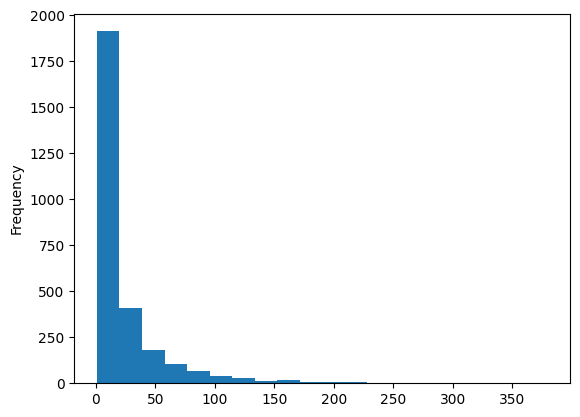

In [206]:
reviews_df.groupby('listing_id')['comments'].count().plot(kind='hist', bins=20)

In [207]:
review_words = reviews_df.groupby('listing_id')['comments'].apply(
    lambda comments: np.concatenate([word_tokenize(str(c)) for c in comments.values])
)

In [208]:
import string

ex = ['Hi', 'there', '.', '?', '!', ',']
[w for w in ex if w not in string.punctuation]

['Hi', 'there']

In [209]:
review_words_f = review_words.map(lambda arr: np.array([w for w in arr if w not in string.punctuation]))

In [210]:
review_words_f.head()

,comments
listing_id,
3353,"[Very, friendly, and, helpful, Convenient, loc..."
5506,"[Terry, 's, Hotel, Alterntv, in, Boston, was, ..."
6695,"[Terry, 's, apartment, is, beautifully, decora..."
6976,"[A, Wonderful, pleasant, and, charming, host, ..."
8792,"[The, unit, was, quiet, convenient, excellentl..."


In [211]:
def bigramify(words):
    finder = BigramCollocationFinder.from_words(words)
    finder.apply_freq_filter(3)
    return finder.nbest(bigram_measures.pmi, 3)

review_bigrams = review_words_f.map(bigramify)

In [212]:
review_bigrams.head(20)

,comments
listing_id,
3353,"[(green, line), (T, station), (at, home)]"
5506,"[(Hotel, Alternative), (better, than), (3, nig..."
6695,"[(Back, Bay), (public, transportation), (Fort,..."
6976,"[(Forest, Hills), (Roslindale, Village), (folk..."
8792,"[(Beacon, Hill), (an, excellent), (I, am)]"
9273,"[(when, we), (If, you), (I, would)]"
9765,"[(of, the), (to, the)]"
9824,"[(Back, Bay), (did, n't), (small, but)]"
9855,"[(of, the), (the, reception), (is, a)]"


In [213]:
def sample_reviews(listing_id):
    bigrams = review_bigrams[listing_id]
    review_texts = reviews[reviews['listing_id'] == listing_id]['comments'].values
    sample_reviews = []
    for bigram in bigrams:
        sample_review_list = list(filter(lambda txt: " ".join(bigram) in txt, review_texts))
        num_reviews = len(sample_review_list)
        sample_review = sample_review_list[0]
        sample_review = sample_review.replace(" ".join(bigram), "****" + " ".join(bigram) + "****")
        start_index = sample_review.index("****")
        sample_text = "..." + sample_review[start_index - 47: start_index + 47] + "..."
        sample_reviews.append(sample_text)
    return sample_reviews

In [214]:
listing.query('id == 4580')['listing_url']

,listing_url


In [215]:
listing.query('id == 67788')['listing_url']

,listing_url


Vizualization

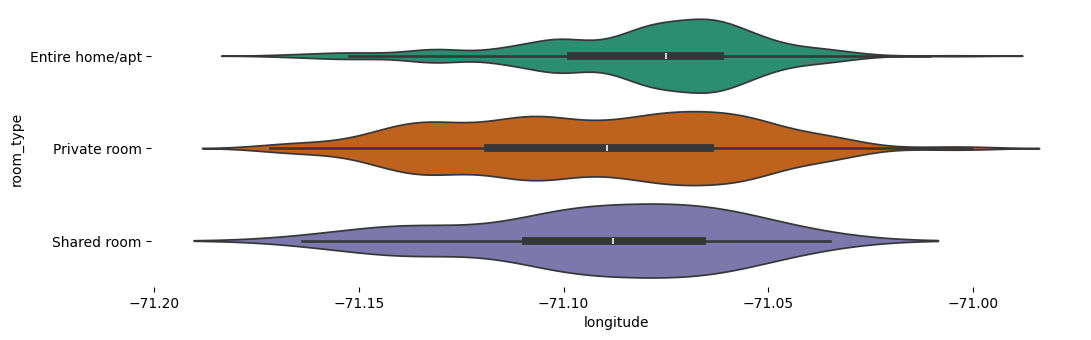

In [216]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(listing['room_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(listing, x='longitude', y='room_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

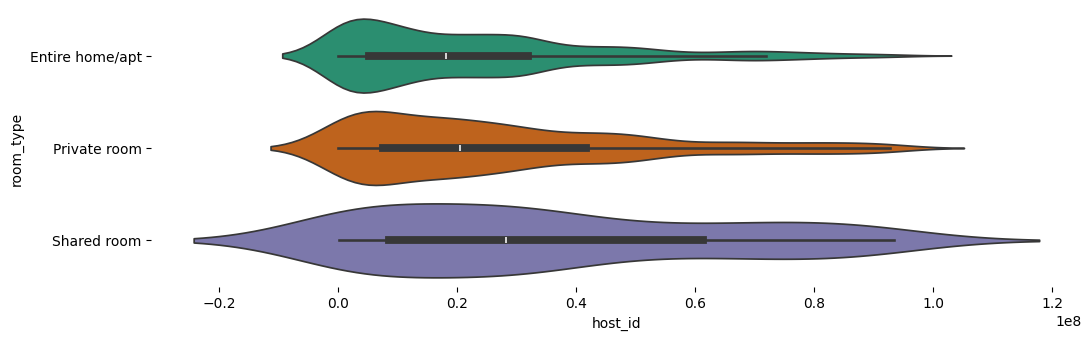

In [217]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(listing['room_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(listing, x='host_id', y='room_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

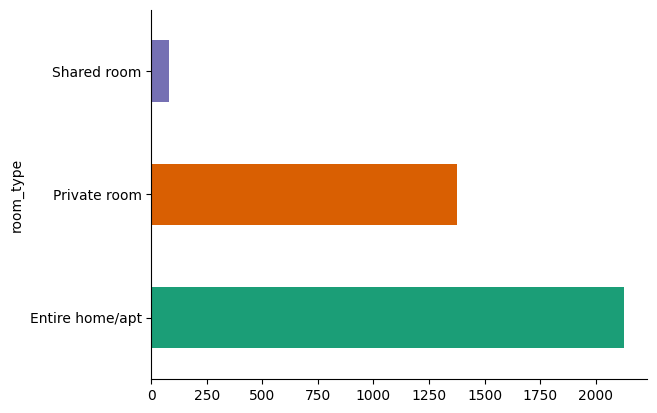

In [218]:
listing.groupby('room_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)